In [90]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [91]:
friday=pd.read_csv("https://raw.githubusercontent.com/stellahrotich/MLProjects101/master/BlackFriday.csv")

In [92]:
friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [93]:
friday.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [94]:
friday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [95]:
friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [96]:
friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [97]:
friday.drop(['User_ID','Product_Category_3','Product_ID'],axis=1)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...
537572,M,36-45,16,C,1,0,1,2.0,11664
537573,M,36-45,16,C,1,0,1,15.0,19196
537574,M,36-45,16,C,1,0,8,15.0,8043
537575,M,36-45,16,C,1,0,5,NaN,7172


In [98]:
friday.Product_Category_2.fillna('others',inplace=True)

In [99]:
friday.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

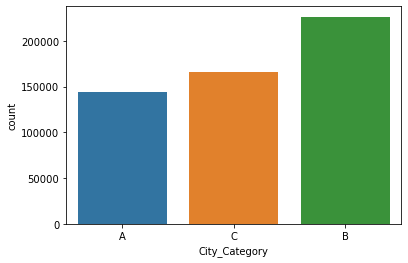

In [100]:
#City category(discrete)
sns.countplot(x="City_Category",data=friday)

In [101]:
part1=friday.Purchase[data.City_Category=='A']
part2=friday.Purchase[data.City_Category=='B']
part3=friday.Purchase[data.City_Category=='C']

In [54]:
stats.f_oneway(part1,part2,part3)

F_onewayResult(statistic=1376.6587765751206, pvalue=0.0)

In [55]:
#Product_Category_2()
data.Product_Category_2.unique()

array(['others', 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5.0, 3.0, 4.0,
       12.0, 9.0, 10.0, 17.0, 13.0, 7.0, 18.0], dtype=object)

In [56]:
data.Product_Category_2.value_counts()

others    166986
8.0        63058
14.0       54158
2.0        48481
16.0       42602
15.0       37317
5.0        25874
4.0        25225
6.0        16251
11.0       13945
17.0       13130
13.0       10369
9.0         5591
12.0        5419
10.0        2991
3.0         2835
18.0        2730
7.0          615
Name: Product_Category_2, dtype: int64

In [57]:
part1=data.Purchase[data.Product_Category_2==8.0]
part2=data.Purchase[data.Product_Category_2==14.0]
part3=data.Purchase[data.Product_Category_2==2.0]
part4=data.Purchase[data.Product_Category_2==16.0]
part5=data.Purchase[data.Product_Category_2==15.0]
part6=data.Purchase[data.Product_Category_2==5.0]
part7=data.Purchase[data.Product_Category_2==4.0]
part8=data.Purchase[data.Product_Category_2==6.0]
part9=data.Purchase[data.Product_Category_2==11.0]
part10=data.Purchase[data.Product_Category_2==17.0]
part11=data.Purchase[data.Product_Category_2==13.0]
part12=data.Purchase[data.Product_Category_2==9.0]
part13=data.Purchase[data.Product_Category_2==12.0]
part14=data.Purchase[data.Product_Category_2==10.0]
part15=data.Purchase[data.Product_Category_2==3.0]
part16=data.Purchase[data.Product_Category_2==18.0]
part17=data.Purchase[data.Product_Category_2==7.0]


In [58]:
stats.f_oneway(part1,part2,part3,part4,part5,part6,part7,part8,part9,part10,part11,part12,part13,part14,part15,part16,part17)

F_onewayResult(statistic=3727.5259855080876, pvalue=0.0)

In [102]:
y=friday.Purchase
x=friday[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']]

In [103]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

In [104]:
train_x.shape

(430061, 7)

In [105]:
test_x.shape

(107516, 7)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

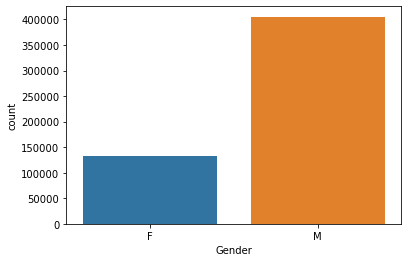

In [106]:
sns.countplot(friday.Gender)

In [107]:
friday.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

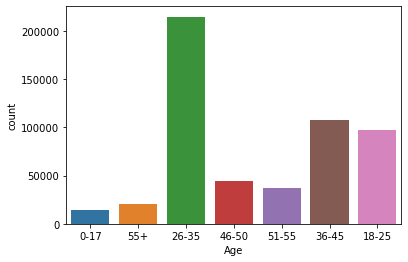

In [108]:
sns.countplot(friday.Age)

In [109]:
friday.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

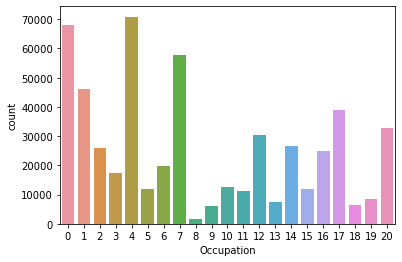

In [110]:
sns.countplot(friday.Occupation)

In [111]:
friday.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

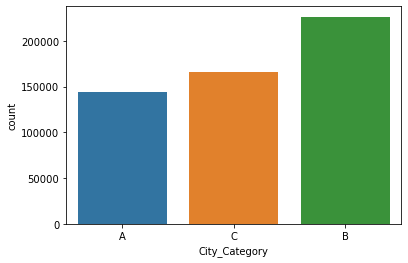

In [112]:
sns.countplot(friday.City_Category)

In [113]:
friday.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

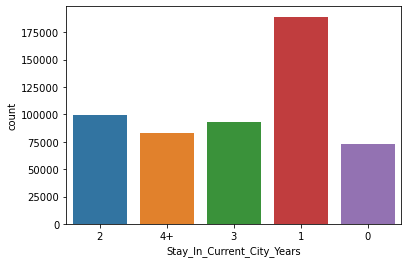

In [71]:
sns.countplot(data.Stay_In_Current_City_Years)

In [114]:
friday.Marital_Status.unique()

array([0, 1], dtype=int64)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

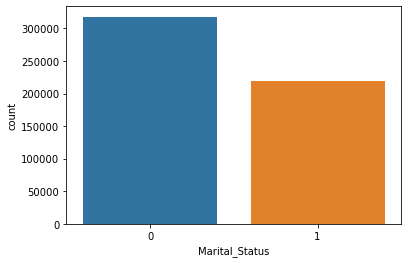

In [115]:
sns.countplot(friday.Marital_Status)

In [116]:
friday.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

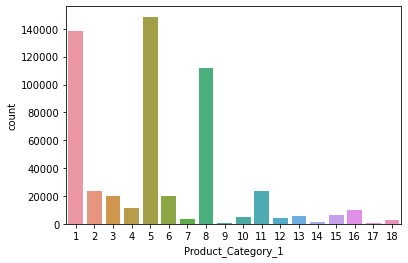

In [117]:
sns.countplot(friday.Product_Category_1)

In [118]:
friday.Product_Category_2.unique()

array(['others', 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5.0, 3.0, 4.0,
       12.0, 9.0, 10.0, 17.0, 13.0, 7.0, 18.0], dtype=object)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

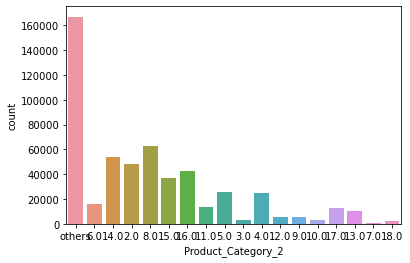

In [119]:
sns.countplot(friday.Product_Category_2)

In [120]:
dummy_var=pd.get_dummies(friday)

In [121]:
dummy_var.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_3', 'Purchase', 'Product_ID_P00000142',
       'Product_ID_P00000242', 'Product_ID_P00000342', 'Product_ID_P00000442',
       ...
       'Product_Category_2_10.0', 'Product_Category_2_11.0',
       'Product_Category_2_12.0', 'Product_Category_2_13.0',
       'Product_Category_2_14.0', 'Product_Category_2_15.0',
       'Product_Category_2_16.0', 'Product_Category_2_17.0',
       'Product_Category_2_18.0', 'Product_Category_2_others'],
      dtype='object', length=3664)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression as LS

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [123]:
scaler_data=scaler.fit(dummy_var)

MemoryError: Unable to allocate 1.83 GiB for an array with shape (3658, 537577) and data type uint8

In [ ]:
scaler_data=pd.DataFrame(scaler_data)

In [ ]:
scaler_data.head()

In [ ]:
x=dummy_var.drop("purchase",axis=1)

In [ ]:
y=data.Purchase

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
model1=LS().fit(train_x,train_y)

In [ ]:
model1.score(train_x,train_y)

In [ ]:
model1.score(x,y)